---
# S&P 500 Stock Analysis: Is Technology the Right Investment for the Future?

---
# Introduction

The S&P 500 stock market index, maintained by S&P Dow Jones Indices, comprises 505 common stocks issued by 500 large-cap companies and traded on American exchanges, and covers about 80 percent of the American equity marekt by capitalization, i.e. S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States. It is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The S&P 500 component stocks cover eleven (11) market sectors and a total of 128 sub industries. 

The objective of this project is to perform the U.S equity market/stocks analysis through the new technology: data science concepts, knowledge, and tools. The data analysis and calculation are based on Python software with modules: NumPy & Pandas, and matplotlib & seaborn libraries.

This project consists of 6 parts.

**feel free to modify**

* Part 1 - S&P 500 stocks historical data collection and cleaning
* Part 2 - Descriptive statistic analysis for S&P 500 stocks
* Part 3 - Data analysis under stock/sector level
* Part 4 - Coronavirus effect on S&P 500 stock prices
* Part 5 - Stock price forecasting and prediction
* Part 6 - Conclusion

Each part is provided in a separate file. It is recommended to follow the order of the files.

---
# Part 1: S&P 500 Stocks Historical Data Collection and Cleaning

#### Task 1:

Import raw data;

Identify missing values, anomalies and outliers (Data cleaning);

Merge datasets and resolve mismatches;

---

In [1]:
# Import and merge datasets

import pandas as pd

sp500 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/stock%20data.csv")
stockReference = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies.csv")

fullDataset = pd.merge(sp500, stockReference, how="left", left_on='Name', right_on='ticker')
fullDataset = fullDataset[['date','close', 'Name', 'ticker', 'company name', 'sector']]
fullDataset.head()

,date,close,Name,ticker,company name,sector
0,08-02-2013,14.75,AAL,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,AAL,American Airlines Group Inc.,Industrials


In [2]:
# Identify Mismatches
# Noticed that 21 stocks could not match to available reference information

unmatchedData = fullDataset[fullDataset["ticker"].isnull()]
print(unmatchedData.Name.unique())
print(unmatchedData.date.unique())

['AET' 'ANDV' 'CA' 'CBG' 'COL' 'CSRA' 'DPS' 'ESRX' 'EVHC' 'GGP' 'HCN'
 'KORS' 'LUK' 'MON' 'PCLN' 'PX' 'SCG' 'SNI' 'TWX' 'WYN' 'XL']
['08-02-2013' '11-02-2013' '12-02-2013' ... '05-02-2018' '06-02-2018'
 '07-02-2018']


In [3]:
# Resolve mismatch issue
# Manually looked up "Names" and appended to stock reference file

stockReference_v2 = pd.read_csv("https://raw.githubusercontent.com/ProjectTeam4/ProjectTeam4.github.io/master/companies_updated.csv")

fullDataset_v2 = pd.merge(sp500, stockReference_v2, how="left", left_on='Name', right_on='ticker')
fullDataset_v2 = fullDataset_v2[['date','close', 'Name', 'ticker', 'company name', 'sector']]

unmatchedData_v2 = fullDataset_v2[fullDataset_v2["ticker"].isnull()]
print(unmatchedData_v2.Name.unique())
print(unmatchedData_v2.date.unique())

[]
[]


In [4]:
# Identify Inconsistencies
# Noticed that the list of stocks were captured based on date of data pull and does not populate historical information for
# stocks that fell out of SP500 between the start date to last date

countByDate = fullDataset_v2.groupby('date').count()
countByDate.sort_values(by=['sector'], ascending=True)

,close,Name,ticker,company name,sector
date,,,,,
26-04-2013,472,472,472,472,472
22-04-2013,476,476,476,476,476
02-05-2013,476,476,476,476,476
15-04-2013,476,476,476,476,476
04-03-2013,476,476,476,476,476
...,...,...,...,...,...
11-01-2018,505,505,505,505,505
29-01-2018,505,505,505,505,505
05-12-2017,505,505,505,505,505


In [0]:
# Resolve inconsistency issue


In [5]:
# Compile final dataset for analysis

cleanDataset = fullDataset_v2[['date', 'close', 'ticker', 'company name', 'sector']]
cleanDataset.head()

,date,close,ticker,company name,sector
0,08-02-2013,14.75,AAL,American Airlines Group Inc.,Industrials
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials


#### Conclusion:

We found issues with data we have gathered. We filled in the gaps where we can and left data as is for things we cannot change 
with current resources


---
# Part 2 - Descriptive Statistic Analysis for S&P 500 Stocks

#### Task 2:

Perform descriptive analysis;

first question: how has the composition of stocks by industry changed over time?

Calculate and graph stock composition by industry over time;

### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

In [0]:
# grouping data by industry
fullDataset_grouped = fullDataset.groupby('sector')

---
# Part 3 - Data Analysis under Stock/Industry Level

#### Task 3: 

Second question: What are the daily and monthly price changes at individual stock and industry level? (Sector Level) 

Calculate daily and monthly price changes by industry and determine distribution of standard deviation



#### Task 4: 

If we are to select a stock by sector at random, what are the chances that it has positive return?

Calculate percentage of stocks with positive return by sector over time.

Which sector should we invest in for the most return? 


In [0]:
df4=cleanDataset
#df4.groupby('ticker').count()

In [0]:
df4['prev_rate'] = df4.groupby('ticker')['close'].shift(1)

In [0]:
import numpy as np

df4["return"] = np.log( df4["close"] / df4["prev_rate"])
df4.loc[df4['return'] <= 0, 'Positive_Flag'] = 0 
df4.loc[df4['return'] > 0, 'Positive_Flag'] = 1
df4.dropna(how='any', inplace=True) 
df4['Positive_Flag'] = df4.Positive_Flag.astype(int)


In [10]:
df4.groupby('sector').mean().sort_values(by=['Positive_Flag'],ascending=False)

,close,prev_rate,return,Positive_Flag
sector,,,,
Technology,82.538647,82.481869,0.000674,0.530137
Utilities,52.690418,52.679533,0.000185,0.527177
Industrials,86.001293,85.950997,0.000536,0.526455
Financial Services,68.546437,68.508725,0.000540,0.525290
Healthcare,104.919422,104.859803,0.000571,0.523964
Real Estate,93.255158,93.238812,0.000133,0.523308
Consumer Defensive,68.337949,68.312652,0.000393,0.518624
Consumer Cyclical,83.418849,83.381439,0.000320,0.515772
Communication Services,189.402383,189.279075,0.000371,0.515609


In [11]:
df4.groupby('sector').mean().sort_values(by=['return'],ascending=False)

,close,prev_rate,return,Positive_Flag
sector,,,,
Technology,82.538647,82.481869,0.000674,0.530137
Healthcare,104.919422,104.859803,0.000571,0.523964
Financial Services,68.546437,68.508725,0.000540,0.525290
Industrials,86.001293,85.950997,0.000536,0.526455
Consumer Defensive,68.337949,68.312652,0.000393,0.518624
Communication Services,189.402383,189.279075,0.000371,0.515609
Consumer Cyclical,83.418849,83.381439,0.000320,0.515772
Basic Materials,86.726218,86.692354,0.000258,0.511556
Utilities,52.690418,52.679533,0.000185,0.527177


In [12]:
dfr=df4.groupby(['date','sector']).mean().sort_values(by=['date'],ascending=True)
dfr

close  ...  Positive_Flag
date       sector                              ...               
01-02-2016 Basic Materials          75.311000  ...       0.500000
           Communication Services  161.357727  ...       0.727273
           Consumer Cyclical        82.687388  ...       0.688312
           Consumer Defensive       73.705541  ...       0.756757
           Energy                   48.753226  ...       0.129032
...                                       ...  ...            ...
31-12-2015 Financial Services       65.998000  ...       0.040541
           Healthcare              114.741387  ...       0.050000
           Industrials              81.411912  ...       0.069444
           Real Estate             101.775000  ...       0.000000
           Utilities                49.724464  ...       0.142857

[13838 rows x 4 columns]

In [0]:
dfr_2=dfr.reset_index()
dfr_2['date'] = pd.to_datetime(dfr_2['date'])
dfr_2['Month_Year'] = pd.to_datetime(dfr_2['date'], format='%m-%Y').dt.strftime('%m-%Y')
dfr_2['Month_Year'] = pd.to_datetime(dfr_2['Month_Year'])

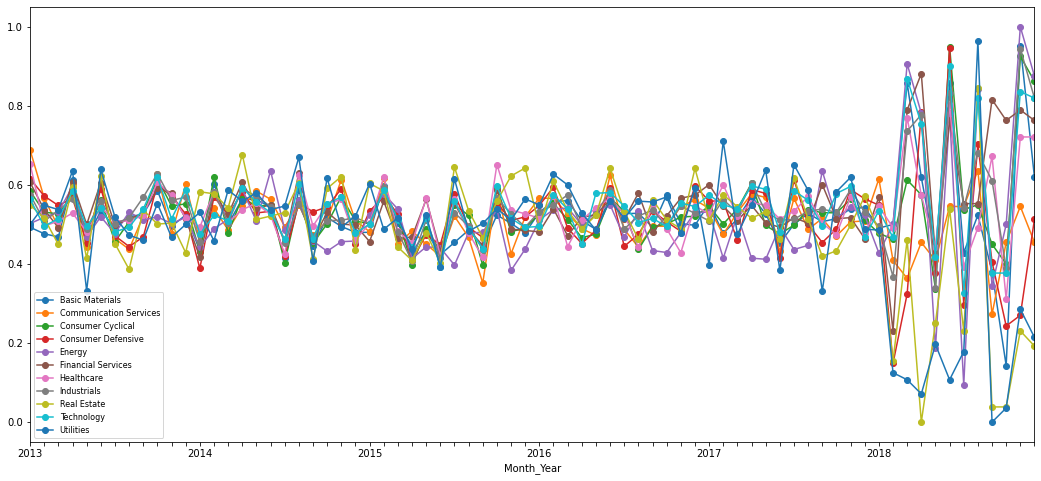

In [14]:
import matplotlib.pyplot as plt
dfr_2.pivot_table('Positive_Flag', 'Month_Year', 'sector', aggfunc='mean').plot(
          kind='line', marker='o', xticks=dfr_2.Month_Year.unique()).legend(loc=3, prop={'size': 8})
plt.gcf().set_size_inches(18, 8)


**Conclusion:**

If we are to select a stock by sector at random, the chance we got a positive return stock is around 49.70% to 53.01% .

We may invest in sector Technology for the most possible better return. 

(2) If we pick the top 5 expensive stock in this sector, what is the monthly return over the period for these 5 stocks? 

Is there any Seasonality for the monthend close price? 

Is there autocorrelation of the monthend close prices of each of the 5 stocks? 

Visualize the correlation between the returns of all pairs of stocks.




In [15]:
df4.loc[df4['sector'] == 'Technology'].groupby('ticker')['close'].max().sort_values(ascending=False)


ticker
GOOGL    1187.56
GOOG     1175.84
AVGO      284.62
AYI       279.15
NVDA      246.85
          ...   
CSRA       33.69
JNPR       32.23
HPE        24.78
HPQ        23.91
AMD        15.20
Name: close, Length: 61, dtype: float64

In [16]:
df4

,date,close,ticker,company name,sector,prev_rate,return,Positive_Flag
1,11-02-2013,14.46,AAL,American Airlines Group Inc.,Industrials,14.75,-0.019857,0
2,12-02-2013,14.27,AAL,American Airlines Group Inc.,Industrials,14.46,-0.013227,0
3,13-02-2013,14.66,AAL,American Airlines Group Inc.,Industrials,14.27,0.026963,1
4,14-02-2013,13.99,AAL,American Airlines Group Inc.,Industrials,14.66,-0.046780,0
5,15-02-2013,14.50,AAL,American Airlines Group Inc.,Industrials,13.99,0.035806,1
...,...,...,...,...,...,...,...,...
619035,01-02-2018,77.82,ZTS,Zoetis Inc. Class A,Healthcare,76.73,0.014106,1
619036,02-02-2018,76.78,ZTS,Zoetis Inc. Class A,Healthcare,77.82,-0.013454,0
619037,05-02-2018,73.83,ZTS,Zoetis Inc. Class A,Healthcare,76.78,-0.039179,0
619038,06-02-2018,73.27,ZTS,Zoetis Inc. Class A,Healthcare,73.83,-0.007614,0


In [17]:
# We will chose 'GOOGL','GOOG','AVGO','AYI' and 'NVDA' for further analysis
dfs = df4[['date','close', 'ticker']]
stocks = ['GOOGL','GOOG','AVGO','AYI','NVDA'] 
dfs_5 = dfs.loc[dfs['ticker'].isin(stocks)]
dfs_5['date'] = pd.to_datetime(dfs_5['date'])
dfs_5.set_index('date', inplace=True)

GOOGL = dfs_5.loc[dfs_5['ticker']=='GOOGL']['close']
GOOG = dfs_5.loc[dfs_5['ticker']=='GOOG']['close']
AVGO = dfs_5.loc[dfs_5['ticker']=='AVGO']['close']
AYI = dfs_5.loc[dfs_5['ticker']=='AYI']['close']
NVDA = dfs_5.loc[dfs_5['ticker']=='NVDA']['close']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 864x432 with 0 Axes>

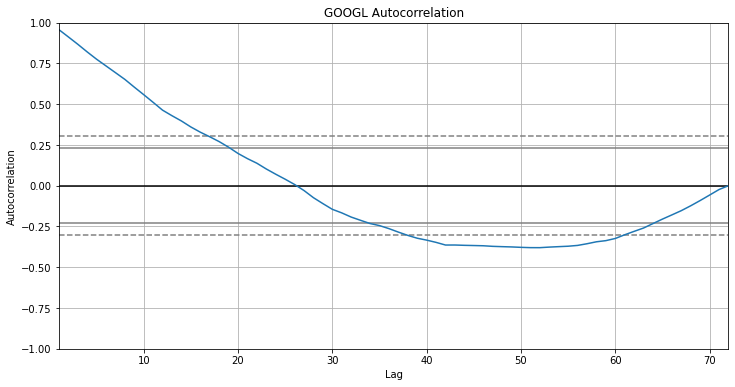

<Figure size 864x432 with 0 Axes>

In [18]:
from pandas.plotting import autocorrelation_plot

GOOGL_monthend = GOOGL.resample('BM').last() 

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

plt.figure()
autocorrelation_plot(GOOGL_monthend)
plt.title('GOOGL Autocorrelation')
plt.figure()

Text(0.5, 1.0, 'A Lag Plot with 1 period of lag')

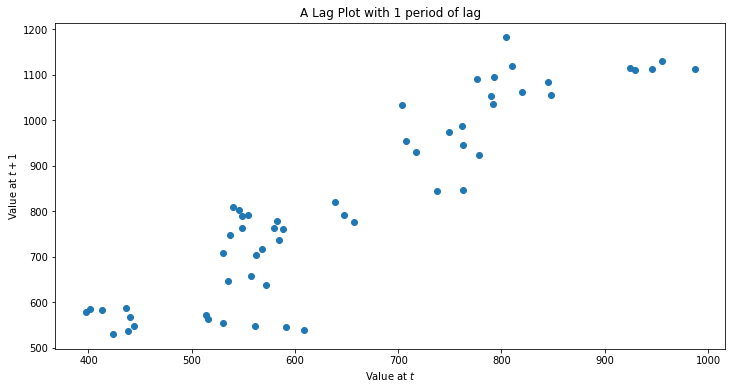

In [19]:
# Choose 16 month 
aLagPlot = pd.plotting.lag_plot(series=GOOGL_monthend, lag=16)
aLagPlot.set_ylabel("Value at ${t+1}$")
aLagPlot.set_xlabel("Value at $t$")
aLagPlot.set_title("A Lag Plot with 1 period of lag")

After 16-17 month, the correlation dropped uner 30% for GOOGL and there is no seasonality.

<Figure size 864x432 with 0 Axes>

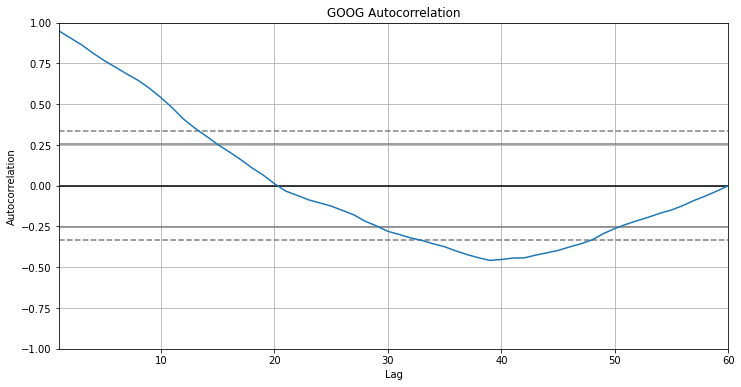

<Figure size 864x432 with 0 Axes>

In [20]:
GOOG_monthend = GOOG.resample('BM').last() 

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

plt.figure()
autocorrelation_plot(GOOG_monthend)
plt.title('GOOG Autocorrelation')
plt.figure()

<Figure size 864x432 with 0 Axes>

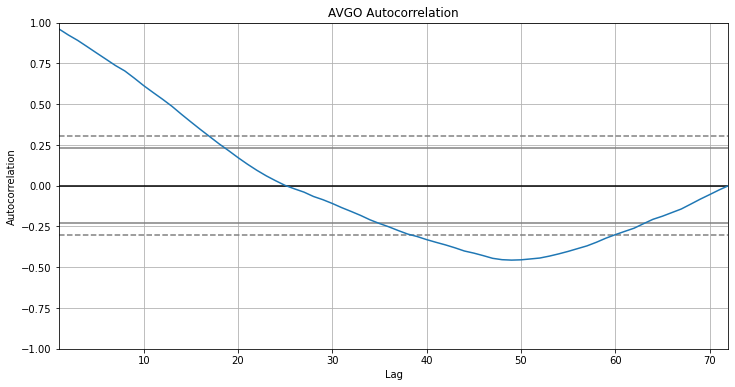

<Figure size 864x432 with 0 Axes>

In [21]:
AVGO_monthend = AVGO.resample('BM').last() 

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

plt.figure()
autocorrelation_plot(AVGO_monthend)
plt.title('AVGO Autocorrelation')
plt.figure()

<Figure size 864x432 with 0 Axes>

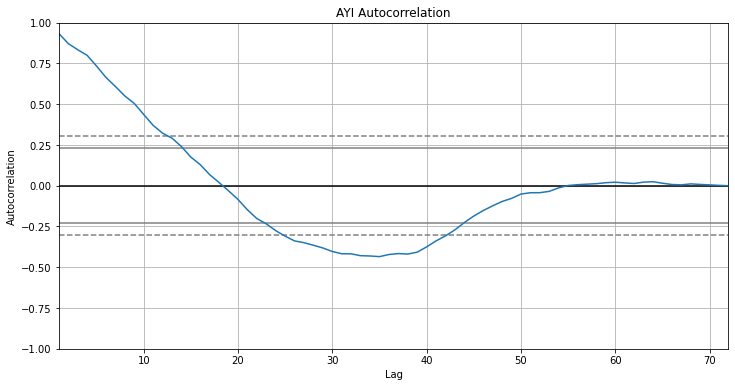

<Figure size 864x432 with 0 Axes>

In [22]:
AYI_monthend = AYI.resample('BM').last() 

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

plt.figure()
autocorrelation_plot(AYI_monthend)
plt.title('AYI Autocorrelation')
plt.figure()

<Figure size 864x432 with 0 Axes>

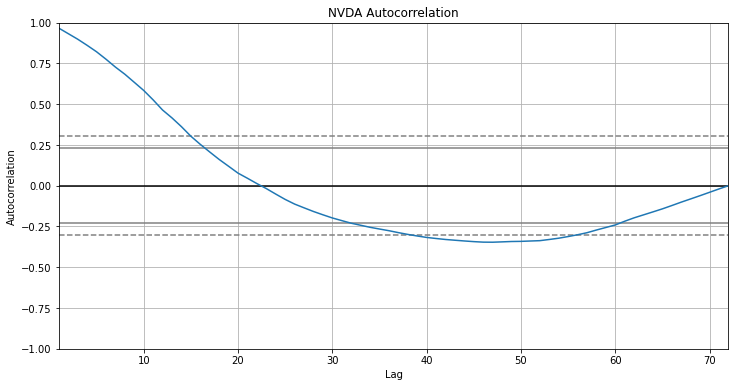

<Figure size 864x432 with 0 Axes>

In [23]:
NVDA_monthend = NVDA.resample('BM').last() 

np.set_printoptions(precision=4, suppress=True)
plt.rc('figure', figsize=(12, 6))

plt.figure()
autocorrelation_plot(NVDA_monthend)
plt.title('NVDA Autocorrelation')
plt.figure()

The other four stocks have the similar result, the correlation dropped under 30% after 12-16 months and there is no seasonality. 

#### Task 5:

Fourth question: Is there a linear correlation between volatility of prices to overall return?

Calculate correlation of stock returns to price volatility by industry over time.



#### Task 6:

Fifth question:Is there a correlation between days of loss until a day of positive return?

Calculate days of loss until positive return and chi square of dataset to determine if they are dependent


Daily stock returns from the S&P500 for 1990-2018 can be used to assess whether 

stock activity each day is independent of the stock’s behavior on previous days. 

We can label each day as Up or Down (D) depending on whether the market was up or down that day by calculating the price change (positive or negative) 

If the days really are independent, then the number of days until a positive trading day should follow a geometric distribution.

H0: The stock market being up or down on a given day is independent from all other days. Under this hypothesis, the number of days until an Up day should follow a geometric distribution.

HA: The stock market being up or down on a given day is not independent from all otherdays.

In [24]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2018, 12, 31)


SP500_all = web.DataReader('^GSPC', 'yahoo', start, end)
#SP500_all.set_index('date', inplace=True)
SP500_all = SP500_all[['Adj Close']]
SP500_all['prev_rate']=SP500_all.shift(1)
SP500_all.fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,Adj Close,prev_rate
Date,,
1990-01-02,359.690002,0.000000
1990-01-03,358.760010,359.690002
1990-01-04,355.670013,358.760010
1990-01-05,352.200012,355.670013
1990-01-08,353.790009,352.200012
...,...,...
2018-12-24,2351.100098,2416.620117
2018-12-26,2467.699951,2351.100098
2018-12-27,2488.830078,2467.699951


In [0]:
SP500_all["change"] = SP500_all["Adj Close"]-SP500_all["prev_rate"]
SP500_all.loc[SP500_all['change'] <= 0, 'UP_Flag'] = 0 
SP500_all.loc[SP500_all['change'] > 0, 'UP_Flag'] = 1
SP500_all.dropna(how='any', inplace=True) 
SP500_all['UP_Flag'] = SP500_all.UP_Flag.astype(int)
Up=SP500_all['UP_Flag'] .tolist()

In [26]:
SP500_all.mean()

Adj Close    1210.087126
prev_rate    1209.793236
change          0.293890
UP_Flag         0.533397
dtype: float64

In [0]:
L1=len(Up) 
Up2=list(set(Up))
Up2.sort(reverse=False)
L2=len(Up2)

for m in range(L2):
  X=set() 
  start=Up.index(Up2[m])
  for n in range(L1):
    stop=L1
    if Up2[m] in tuple(Up)[start:stop]:
      a=Up.index(Up2[m],start,stop)
      X.add(a)
      start=start+1

In [28]:
s1 = list(X)
s1.insert(0,0) 
s2=[]
for i in range(len(s1)-1):
    b = s1[i+1] - s1[i]
    s2.append(b)
print(s2)

[3, 3, 3, 2, 1, 2, 6, 2, 1, 2, 2, 2, 1, 1, 6, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 2, 1, 7, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 5, 1, 3, 2, 1, 1, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 5, 1, 1, 2, 1, 1, 3, 4, 1, 2, 2, 1, 1, 2, 3, 3, 1, 5, 3, 1, 1, 2, 2, 4, 1, 3, 1, 1, 2, 4, 2, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 1, 1, 3, 2, 4, 1, 2, 2, 2, 1, 7, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 2, 1, 3, 1, 2, 2, 2, 6, 2, 3, 2, 1, 1, 4, 2, 2, 3, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 1, 1, 7, 2, 1, 4, 1, 3, 1, 2, 3, 1, 3, 1, 1, 3, 5, 2, 1, 1, 2, 2, 4, 1, 1, 4, 1, 1, 1, 3, 9, 1, 2, 2, 1, 1, 2, 4, 1, 5, 2, 1, 1, 1, 1, 2, 3, 3, 1, 1, 5, 1, 2, 1, 1, 3, 3, 3, 3, 4, 4, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 2, 3, 2, 4, 2, 1, 4, 2, 4, 1, 2, 2, 4, 4, 1, 3, 1, 1, 2, 1, 4, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 2, 3, 1, 1, 2, 4, 1, 2, 3, 1, 3, 2, 1, 2, 2, 2, 4, 1, 1, 4, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 3, 1, 1, 1, 1, 5, 

In [29]:
from collections import Counter
Counter(s2)

Counter({1: 2020,
         2: 1014,
         3: 458,
         4: 244,
         5: 93,
         6: 45,
         7: 17,
         8: 2,
         9: 3,
         10: 1})

Then we may get the following results for further analysis: 

|Days|1|2|3|4|5|6|7+|Total|
|------|------|-----|-----|-----|-----|-----|----|------|
|Observed| 2020| 1014| 458| 244|  93| 45| 23| 3897|

The S&P500 was positive on 53.34% of those days.

In [30]:
import scipy.stats as stats
from scipy.stats import chisquare
obs_nd = [2020, 1014, 458, 244, 93, 45, 23]
total_days = sum(obs_nd)
p = 0.5334

expected_values =[]

for days in range(6):
    expected_values.append(round(p*(1-p)**days*total_days,0))

expected_values.append(round((1-stats.geom.cdf(6,p))*total_days,0))

print('The expected values are: ', expected_values)

The expected values are:  [2079.0, 970.0, 453.0, 211.0, 99.0, 46.0, 40.0]


In [31]:
chi_testbook = chisquare(obs_nd, expected_values)

print('Chis-square value is: ', chi_testbook.statistic)
print('p-value: ', chi_testbook.pvalue)

Chis-square value is:  16.496939535821003
p-value:  0.01132121004722022


p value is around 0.01 which is smaller than significance test 0.05, so the H0 can be rejected.

The stock market being up or down on a given day is not independent from all other days.


#### Task 8: 

Seventh question: Is there seasonality in the data? (sector level does Sector perform welll during certain period)

Find seasonality effect using lag plot or autocorrelation functions.

### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 4 - Coronavirus Effect on S&P 500 Stock Prices

#### Task 7:

Sixth question: Can we measure or see the coronavirus effect on S&P 500 stock prices?

Find the coronavirus start date from the "https://github.com/CSSEGISandData/COVID-19" source, prepare trend analysis or graphs and compare it with previous periods. (Jan- Now） ( Compare with previous year) 


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 5 - Stock Price Forecasting and Prediction

#### Task 8:

Some other predition model analysis?


### To be Filled:

* **Comments:**

* **Codes:**

* **Conclusion:**

---
# Part 6 - Conclusion

### To be Filled:

* **Conclusion:**

## References

### To be Filled:

* **References:**